# Step 4 - Pre-processing and Training Data Development

### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   **Pre-processing and Training Data Development**

5.  Modeling
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Loading the necessary packages. </font>**

In [31]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline

**<font color='teal'>  Loading the csv file  created in step 3. </font>**

In [32]:
df=pd.read_csv('./data/step3_EDA_output.csv',index_col=0)
df.head()

,Wind Speed (m/s),Real Power (kW),Wind Direction (⁰),Ambient Temperature (⁰C),Wind Speed 79.1m (m/s),Wind Direction 79.1m (⁰),Air Temp 76.7m (⁰C),Relative Humidity 76.7m (%),Barometric Pressure (mbar),Wind Speed Gradient (m/s),...,Relative Humidity Gradient (%),Ri_B,Summer,Winter,High speed,Low speed,Std. Wind Speed (m/s),TI Wind Speed,Std. Wind Speed 79.1m (m/s),TI Wind Speed 79.1m (m/s)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-08-19 01:00:00,5.556833,214.633333,239.385000,21.40,5.330633,253.377777,20.935833,54.757833,975.052380,1.629017,...,-3.236667,-0.591926,1.0,0.0,0.0,1.0,0.105469,0.018980,0.180488,0.033859
2012-08-19 01:01:00,5.409500,221.266667,240.626667,21.40,5.245217,252.030522,20.909667,55.532667,975.062235,1.730033,...,-3.410167,-0.507177,1.0,0.0,0.0,1.0,0.036473,0.006742,0.202429,0.038593
2012-08-19 01:02:00,5.646833,245.200000,240.248333,21.40,5.581933,253.660155,20.873833,55.137833,974.933405,1.919733,...,-4.813833,-0.558537,1.0,0.0,0.0,1.0,0.105918,0.018757,0.184955,0.033135
2012-08-19 01:03:00,5.718667,253.850000,239.643333,21.28,5.841283,255.637168,20.863000,54.162833,974.981192,1.876100,...,-5.227500,-0.605762,1.0,0.0,0.0,1.0,0.041882,0.007324,0.138177,0.023655
2012-08-19 01:04:00,5.712667,257.216667,240.478333,21.00,5.975533,256.679192,20.882833,53.614000,974.921545,1.785267,...,-5.427500,-0.599312,1.0,0.0,0.0,1.0,0.052299,0.009155,0.100991,0.016901


**<font color='teal'>   Adding square and cube of velocities and inverse of temperature as features. </font>**

A linear model will be tested subsequently. However, from eq 1. $P\propto U^3$ and $\rho\propto 1/T$ both non-linear relationships. To incorporate non-linear effects the higher power of velocity and inverse Temperatures are added as features.

In [33]:
df.columns

Index(['Wind Speed (m/s)', 'Real Power (kW)', 'Wind Direction (⁰)',
       'Ambient Temperature (⁰C)', 'Wind Speed 79.1m (m/s)',
       'Wind Direction 79.1m (⁰)', 'Air Temp 76.7m (⁰C)',
       'Relative Humidity 76.7m (%)', 'Barometric Pressure (mbar)',
       'Wind Speed Gradient (m/s)', 'Wind Direction Gradient (⁰)',
       'Virt. Pot. Temp. Gradient ($^\circ C$)',
       'Relative Humidity Gradient (%)', 'Ri_B', 'Summer', 'Winter',
       'High speed', 'Low speed', 'Std. Wind Speed (m/s)', 'TI Wind Speed',
       'Std. Wind Speed 79.1m (m/s)', 'TI Wind Speed 79.1m (m/s)'],
      dtype='object')

In [34]:
df['Square Wind Speed (m/s)^2']=df['Wind Speed (m/s)']*df['Wind Speed (m/s)']
df['Cube Wind Speed (m/s)^3']=df['Square Wind Speed (m/s)^2']*df['Wind Speed (m/s)']

df['Square Wind Speed 79.1m (m/s)^2']=df['Wind Speed 79.1m (m/s)']*df['Wind Speed 79.1m (m/s)']
df['Cube Wind Speed 79.1m (m/s)^3']=df['Wind Speed 79.1m (m/s)']*df['Wind Speed 79.1m (m/s)']

df['Inverse Ambient Temperature (1/⁰C)']=1/df['Ambient Temperature (⁰C)']
df['Inverse Air Temp 76.7m (1/⁰C)']=1/df['Air Temp 76.7m (⁰C)']


**<font color='teal'> Creating a Dataframe with log of features.</font>**

Again from eq. 1, $P\propto product(\rho, U^3,..)$. If a linear model is used, adding log of features will have an equivalent effect of feature products as shown in eq. 7.

In [35]:
#log of negetive temperature may lead to loosing this feature. To avoid the temperatures are converted to Kelvin scale.
df_copy=df

df_copy['Ambient Temperature (⁰C)']=df_copy['Ambient Temperature (⁰C)']+273
df_copy['Air Temp 76.7m (⁰C)']=df_copy['Air Temp 76.7m (⁰C)']+273



df_abs=df_copy.applymap(np.absolute)

In [36]:
df_abs['Summer']=df_abs['Summer']+1
df_abs['Winter']=df_abs['Winter']+1
df_abs['High speed']=df_abs['High speed']+1
df_abs['Low speed']=df_abs['Low speed']+1

df_log=df_abs.applymap(np.log10) 

# Since Ri_B<0 will be modified, loosing its physical meaning, this feature will be dropped. Further, temperatures will also have to dropped

## Standardizing the magnitude of numeric features

In [37]:
x = df.drop(['Real Power (kW)'], axis =1)
y=df['Real Power (kW)']

x_scaled=preprocessing.scale(x, axis=0, with_mean=True, with_std=True, copy=True)

In [38]:
x_scaled.mean(axis=0)

array([ 2.81256500e-16,  5.92118946e-17, -2.25005200e-15, -3.33066907e-17,
       -5.32907052e-16,  2.96059473e-15, -5.92118946e-17, -6.42449057e-15,
        5.92118946e-17,  9.89948864e-17, -5.92118946e-17,  0.00000000e+00,
        2.96059473e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.88178420e-17, -5.92118946e-17, -7.40148683e-17,
       -1.62832710e-16, -2.36847579e-16, -1.48029737e-16, -1.96139401e-16,
       -1.96139401e-16,  5.92118946e-17,  5.92118946e-17])

In [39]:
x_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
x_scaled.shape

(240, 27)

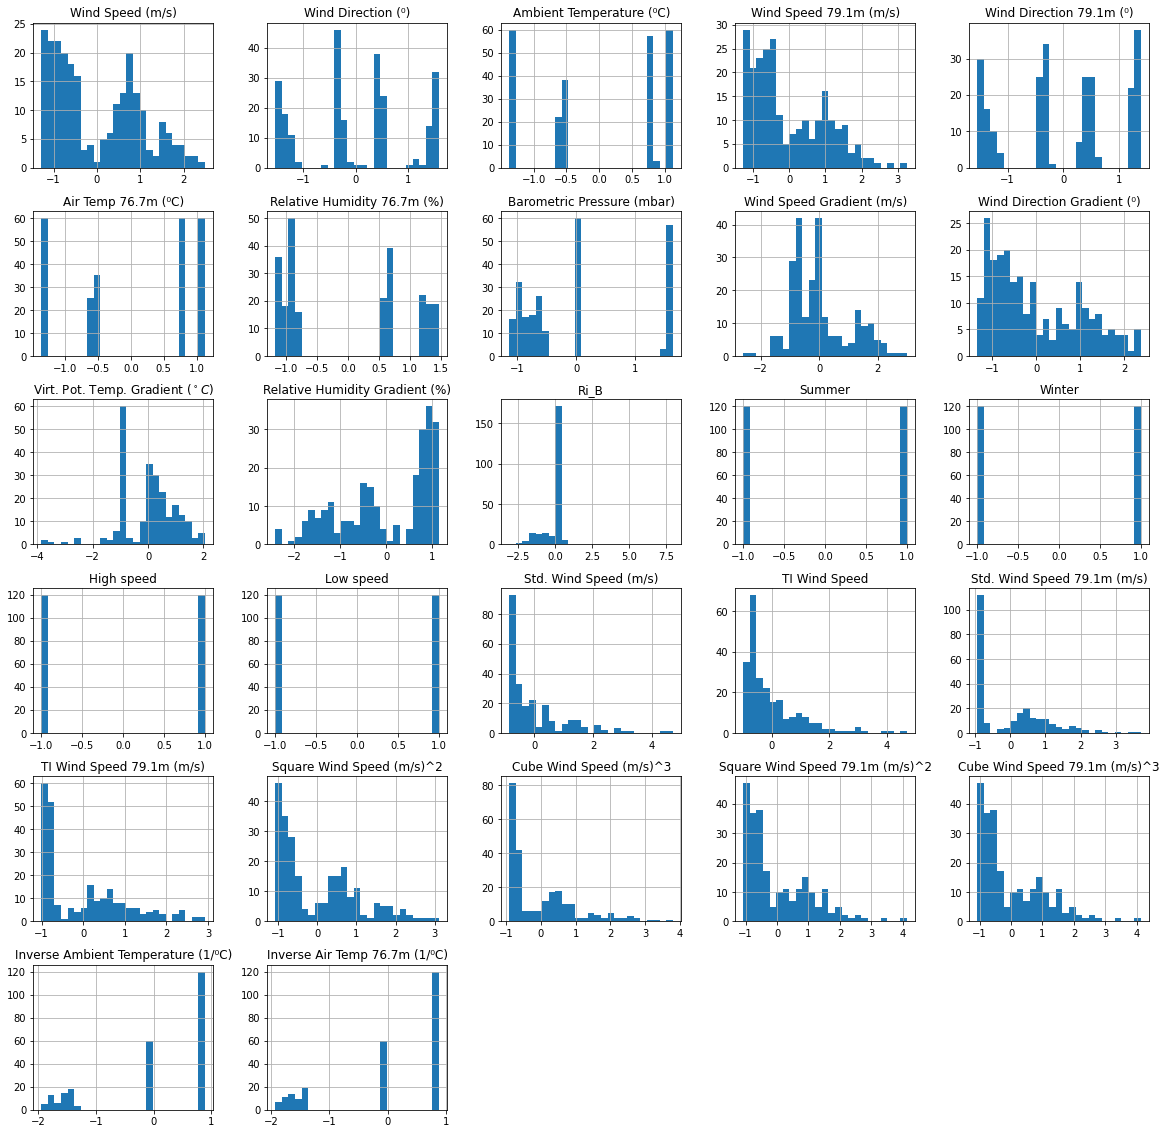

In [41]:
x_scaled_check_df=pd.DataFrame(x_scaled,columns=x.columns)
hist=x_scaled_check_df.hist(bins=25,figsize=[20,20])

### Repeating standardizing for the log dataframe

In [42]:
x_log = df_log.drop(['Real Power (kW)','Ri_B'], axis =1)
y_log=df_log['Real Power (kW)']

x_scaled_log=preprocessing.scale(x_log, axis=0, with_mean=True, with_std=True, copy=True)

In [43]:
x_scaled_log.mean(axis=0)

array([ 5.14403335e-16,  1.18423789e-15, -3.07901852e-15,  8.06762065e-16,
        4.61852778e-15, -4.85537536e-15, -1.12502600e-15, -1.55904919e-13,
       -1.18423789e-16,  7.40148683e-18,  2.07241631e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.77635684e-16, -1.33226763e-16,  5.92118946e-17, -1.62832710e-16,
        4.73695157e-16, -7.40148683e-18,  8.14163551e-16,  8.14163551e-16,
       -7.69754630e-16, -1.18423789e-16])

In [45]:
x_scaled_log.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Splitting into training and testing datasets

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25)

In [47]:
X_train.shape, X_test.shape

((180, 27), (60, 27))

In [48]:
y_train.shape, y_test.shape

((180,), (60,))

### Repeating standardizing for the log dataframe

In [49]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_scaled_log, y_log, test_size=0.25)

In [ ]:
X_train.shape, X_test.shape